# Bootstrap distances to the future

Estimate uncertainty of distance to the future values per sample and model using the bootstrap of observed distances across time.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [51]:
n_bootstraps = 10000

In [69]:
color_by_predictor = {
    'naive': '#cccccc',
    'offspring': '#000000',
    'normalized_fitness': '#000000',
    'fitness': '#000000',
    'ep': '#4575b4',
    'ep_wolf': '#4575b4',
    'ep_star': '#4575b4',
    'ep_x': '#4575b4',
    'ep_x_koel': '#4575b4',
    'ep_x_wolf': '#4575b4',
    'oracle_x': '#4575b4',
    'rb': '#4575b4',
    'cTiter': '#91bfdb',
    'cTiter_x': '#91bfdb',
    'cTiterSub': '#91bfdb',
    'cTiterSub_star': '#91bfdb',
    'cTiterSub_x': '#91bfdb',
    'fra_cTiter_x': '#91bfdb',
    'ne_star': '#2ca25f',
    'dms_star': '#99d8c9',
    "dms_nonepitope": "#99d8c9",
    "dms_entropy": "#99d8c9",
    'unnormalized_lbi': '#fc8d59',
    'lbi': '#fc8d59',
    'delta_frequency': '#d73027',
    'lbi-ne_star': "#ffffff",
    'ne_star-lbi': "#ffffff",
    'cTiter_x-ne_star': "#ffffff",
    'cTiter_x-ne_star-lbi': "#ffffff",
    'fra_cTiter_x-ne_star': "#ffffff"
}

name_by_predictor = {
    "naive": "naive",
    "offspring": "observed fitness",
    "normalized_fitness": "true fitness",
    "fitness": "estimated fitness",
    "ep": "epitope mutations",
    "ep_wolf": "Wolf epitope mutations",
    "ep_star": "epitope ancestor",
    "ep_x": "epitope antigenic\nnovelty",
    "ep_x_koel": "Koel epitope antigenic novelty",
    "ep_x_wolf": "Wolf epitope antigenic novelty",
    "oracle_x": "oracle antigenic novelty",
    "rb": "Koel epitope mutations",
    "cTiter": "antigenic advance",
    "cTiter_x": "HI antigenic\nnovelty",
    "cTiterSub": "linear HI mut phenotypes",
    "cTiterSub_star": "ancestral HI mut phenotypes",
    "cTiterSub_x": "HI sub cross-immunity",
    "fra_cTiter_x": "FRA antigenic novelty",
    "ne_star": "mutational load",
    "dms_star": "DMS mutational\neffects",
    "dms_nonepitope": "DMS mutational load",
    "dms_entropy": "DMS entropy",
    "unnormalized_lbi": "unnormalized LBI",
    "lbi": "LBI",
    "delta_frequency": "delta\nfrequency",
    'lbi-ne_star': "mutational load +\n LBI",
    'ne_star-lbi': "mutational load +\n LBI",
    'cTiter_x-ne_star': "mutational load +\nHI antigenic\nnovelty",
    'cTiter_x-ne_star-lbi': "mutational load +\nHI antigenic novelty +\nLBI",
    'fra_cTiter_x-ne_star': "mutational load +\nFRA antigenic novelty"
}

name_by_sample = {
    "simulated_sample_3": "simulated populations",
    "natural_sample_1_with_90_vpm_sliding": "natural populations"
}

In [70]:
color_by_model = {name_by_predictor[predictor]: color for predictor, color in color_by_predictor.items()}

In [54]:
predictors_by_sample = {
    "simulated_sample_3": ["naive", "ep_x", "ne_star", "lbi", "delta_frequency", "lbi-ne_star"],
    "natural_sample_1_with_90_vpm_sliding": [
        "naive",
        "ep_x",
        "cTiter_x",
        "ne_star",
        "dms_star",
        "lbi",
        "delta_frequency",
        "cTiter_x-ne_star",
        "ne_star-lbi",
        "cTiter_x-ne_star-lbi"
    ],
    "natural_sample_20191001": ["naive", "cTiter_x-ne_star", "fra_cTiter_x-ne_star", "ne_star-lbi", "cTiter_x-ne_star-lbi"]
}

In [55]:
sns.set_style("ticks")

In [56]:
df = pd.read_table("../results/distance_model_errors.tsv")

## Calculate bootstraps for all models and samples

In [57]:
df["sample"].drop_duplicates()

0                        simulated_sample_3
330    natural_sample_1_with_90_vpm_sliding
767                 natural_sample_20191001
Name: sample, dtype: object

In [58]:
df.columns

Index(['average_distance_to_future', 'average_diversity_in_future',
       'error_type', 'future_timepoint', 'null_validation_error', 'predictors',
       'sample', 'timepoint', 'type', 'validation_error', 'validation_n',
       'validation_timepoint'],
      dtype='object')

In [59]:
mean_distances = []
bootstrap_distances = []
for (sample, error_type, predictors), group_df in df.groupby(["sample", "error_type", "predictors"]):
    print(f"Processing: {sample}, {error_type}, {predictors}")
    bootstrap_distribution = [
        group_df["validation_error"].sample(frac=1.0, replace=True).mean()
        for i in range(n_bootstraps)
    ]
    
    mean_distances.append({
        "sample": sample,
        "error_type": error_type,
        "predictors": predictors,
        "mean_distance": group_df["validation_error"].mean()
    })
    
    bootstrap_distances.append(pd.DataFrame({
        "sample": sample,
        "error_type": error_type,
        "predictors": predictors,
        "bootstrap_distance": bootstrap_distribution
    }))

Processing: natural_sample_1_with_90_vpm_sliding, test, cTiter
Processing: natural_sample_1_with_90_vpm_sliding, test, cTiter_x
Processing: natural_sample_1_with_90_vpm_sliding, test, cTiter_x-ne_star
Processing: natural_sample_1_with_90_vpm_sliding, test, cTiter_x-ne_star-lbi
Processing: natural_sample_1_with_90_vpm_sliding, test, delta_frequency
Processing: natural_sample_1_with_90_vpm_sliding, test, dms_entropy
Processing: natural_sample_1_with_90_vpm_sliding, test, dms_nonepitope
Processing: natural_sample_1_with_90_vpm_sliding, test, dms_star
Processing: natural_sample_1_with_90_vpm_sliding, test, ep_star
Processing: natural_sample_1_with_90_vpm_sliding, test, ep_star-ne_star
Processing: natural_sample_1_with_90_vpm_sliding, test, ep_x
Processing: natural_sample_1_with_90_vpm_sliding, test, ep_x-ne_star
Processing: natural_sample_1_with_90_vpm_sliding, test, ep_x_koel
Processing: natural_sample_1_with_90_vpm_sliding, test, ep_x_wolf
Processing: natural_sample_1_with_90_vpm_sliding

In [60]:
mean_distances_df = pd.DataFrame(mean_distances)

In [61]:
mean_distances_df.head()

,sample,error_type,predictors,mean_distance
0,natural_sample_1_with_90_vpm_sliding,test,cTiter,6.230169
1,natural_sample_1_with_90_vpm_sliding,test,cTiter_x,6.208217
2,natural_sample_1_with_90_vpm_sliding,test,cTiter_x-ne_star,5.966084
3,natural_sample_1_with_90_vpm_sliding,test,cTiter_x-ne_star-lbi,5.990553
4,natural_sample_1_with_90_vpm_sliding,test,delta_frequency,6.903146


In [62]:
bootstraps_df = pd.concat(bootstrap_distances)

In [63]:
bootstraps_df["model"] = bootstraps_df["predictors"].map(name_by_predictor)

In [64]:
bootstraps_df.head()

,sample,error_type,predictors,bootstrap_distance,model
0,natural_sample_1_with_90_vpm_sliding,test,cTiter,6.266215,antigenic advance
1,natural_sample_1_with_90_vpm_sliding,test,cTiter,6.089568,antigenic advance
2,natural_sample_1_with_90_vpm_sliding,test,cTiter,5.833099,antigenic advance
3,natural_sample_1_with_90_vpm_sliding,test,cTiter,6.045072,antigenic advance
4,natural_sample_1_with_90_vpm_sliding,test,cTiter,6.454522,antigenic advance


In [65]:
bootstraps_df.shape

(630000, 5)

In [76]:
def plot_bootstrap_distances(bootstraps_df, predictors, title):
    fig, axes = plt.subplots(2, 1, figsize=(16, 8), gridspec_kw={"hspace": 0.5})

    bootstrap_df = bootstraps_df.query("error_type == 'validation'")
    bootstrap_df = bootstrap_df[bootstrap_df["predictors"].isin(predictors)].copy()

    # Use this order for both validation and test facets as in Tables 1 and 2.
    predictors_order = bootstrap_df.groupby("model")["bootstrap_distance"].mean().sort_values().reset_index()["model"].values

    # Calculate lower bound distance for naive distribution (lower 5th percentile) per error type.
    lower_bound_naive_distance = np.percentile(
        bootstrap_df.query("predictors == 'naive'")["bootstrap_distance"],
        0.05
    )

    bootstrap_df["better_than_naive"] = bootstrap_df["bootstrap_distance"] < lower_bound_naive_distance
    proportion_better = (bootstrap_df.groupby("model")["better_than_naive"].sum() / float(n_bootstraps)).reset_index()
    print(proportion_better)
    
    validation_ax = axes[0]
    validation_ax = sns.violinplot(
        x="model",
        y="bootstrap_distance",
        data=bootstrap_df,
        order=predictors_order,
        ax=validation_ax,
        palette=color_by_model
    )

    validation_ax.axhline(y=lower_bound_naive_distance, label="naive", color="#999999", zorder=-10)
    validation_ax.title.set_text(f"Validation of {name_by_sample[sample]}")

    validation_ax.set_xlabel("Model")
    validation_ax.set_ylabel("Bootstrapped\ndistance to future (AAs)")

    bootstrap_df = bootstraps_df.query("error_type == 'test'")
    bootstrap_df = bootstrap_df[bootstrap_df["predictors"].isin(predictors)].copy()

    # Calculate lower bound distance for naive distribution (lower 5th percentile) per error type.
    lower_bound_naive_distance = np.percentile(
        bootstrap_df.query("predictors == 'naive'")["bootstrap_distance"],
        0.05
    )
    
    bootstrap_df["better_than_naive"] = bootstrap_df["bootstrap_distance"] < lower_bound_naive_distance
    proportion_better = (bootstrap_df.groupby("model")["better_than_naive"].sum() / float(n_bootstraps)).reset_index()
    print(proportion_better)

    test_ax = axes[1]
    test_ax = sns.violinplot(
        x="model",
        y="bootstrap_distance",
        data=bootstrap_df,
        order=predictors_order,
        ax=test_ax,
        palette=color_by_model
    )

    test_ax.set_xlabel("Model")
    test_ax.set_ylabel("Bootstrapped\ndistance to future (AAs)")

    test_ax.axhline(y=lower_bound_naive_distance, label="naive", color="#999999", zorder=-10)
    test_ax.title.set_text(f"Test of {name_by_sample[sample]}")

    sns.despine()
    
    return fig, axes

                        model  better_than_naive
0                         LBI             0.9743
1            delta\nfrequency             0.6146
2  epitope antigenic\nnovelty             0.0002
3             mutational load             0.3932
4     mutational load +\n LBI             0.9994
5                       naive             0.0005
                        model  better_than_naive
0                         LBI             0.9566
1            delta\nfrequency             0.0607
2  epitope antigenic\nnovelty             0.0010
3             mutational load             0.2824
4     mutational load +\n LBI             0.9990
5                       naive             0.0005


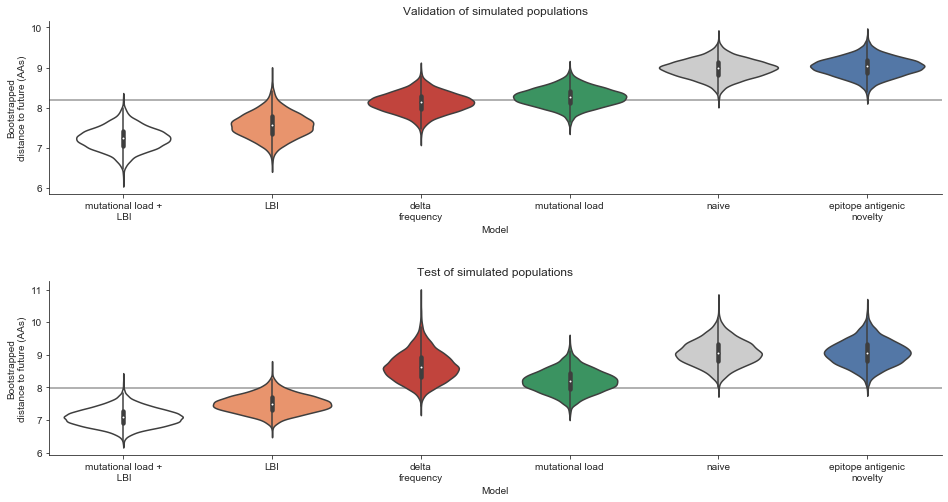

In [77]:
sample = "simulated_sample_3"
fig, axes = plot_bootstrap_distances(
    bootstraps_df.query(f"sample == '{sample}'"),
    predictors_by_sample[sample],
    name_by_sample[sample]
)

                                            model  better_than_naive
0                         DMS mutational\neffects             0.0011
1                           HI antigenic\nnovelty             0.0684
2                                             LBI             0.3746
3                                delta\nfrequency             0.0488
4                      epitope antigenic\nnovelty             0.0000
5                                 mutational load             0.0158
6                         mutational load +\n LBI             0.6182
7        mutational load +\nHI antigenic\nnovelty             0.1922
8  mutational load +\nHI antigenic novelty +\nLBI             0.1790
9                                           naive             0.0005
                                            model  better_than_naive
0                         DMS mutational\neffects             0.0006
1                           HI antigenic\nnovelty             0.0302
2                                 

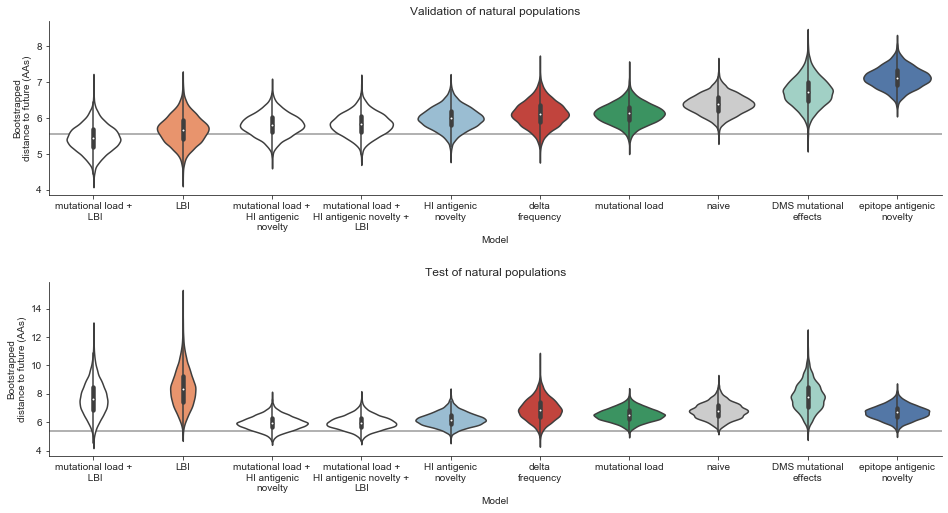

In [78]:
sample = "natural_sample_1_with_90_vpm_sliding"
fig, axes = plot_bootstrap_distances(
    bootstraps_df.query(f"sample == '{sample}'"),
    predictors_by_sample[sample],
    name_by_sample[sample]
)

In [75]:
mean_distances_df.query("predictors == 'naive'").groupby(["sample", "error_type"])["mean_distance"].mean()

sample                                error_type
natural_sample_1_with_90_vpm_sliding  test          6.821066
                                      validation    6.399325
natural_sample_20191001               validation    6.816755
simulated_sample_3                    test          9.071456
                                      validation    8.974596
Name: mean_distance, dtype: float64